# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [918]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [919]:
bike= pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [920]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [921]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [922]:
bike.shape

(730, 16)

#### Check for NULL/MISSING values

In [923]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [924]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

## Removing redundant & unwanted columns

In [925]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [926]:
df=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [927]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

- Before creating dummy variables, we will have to convert them into 'category' data types.

In [928]:
# Convert to 'category' data type

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [930]:
# Drop first dummy variable for each set of dummies created.

In [931]:
n= pd.get_dummies(df[['season','weathersit','mnth','weekday']], drop_first=True)

In [932]:
df= pd.concat([df, n], axis = 1)

In [933]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [934]:
# Drop original variable for which the dummy was created
df.drop(['season','weathersit','mnth','weekday'], axis = 1, inplace = True)

In [935]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


In [936]:
df.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [937]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [938]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  weathersit_2  510 non-null    uint8  
 12  weathersit_3  510 non-null    uint8  
 13  mnth_2        510 non-null    uint8  
 14  mnth_3        510 non-null    uint8  
 15  mnth_4        510 non-null    uint8  
 16  mnth_5        510 non-null    uint8  
 17  mnth_6        510 non-null    uint8  
 18  mnth_7        510 non-null   

In [939]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  weathersit_2  219 non-null    uint8  
 12  weathersit_3  219 non-null    uint8  
 13  mnth_2        219 non-null    uint8  
 14  mnth_3        219 non-null    uint8  
 15  mnth_4        219 non-null    uint8  
 16  mnth_5        219 non-null    uint8  
 17  mnth_6        219 non-null    uint8  
 18  mnth_7        219 non-null   

In [940]:
df_train.shape

(510, 30)

In [941]:
df_test.shape

(219, 30)

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [942]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

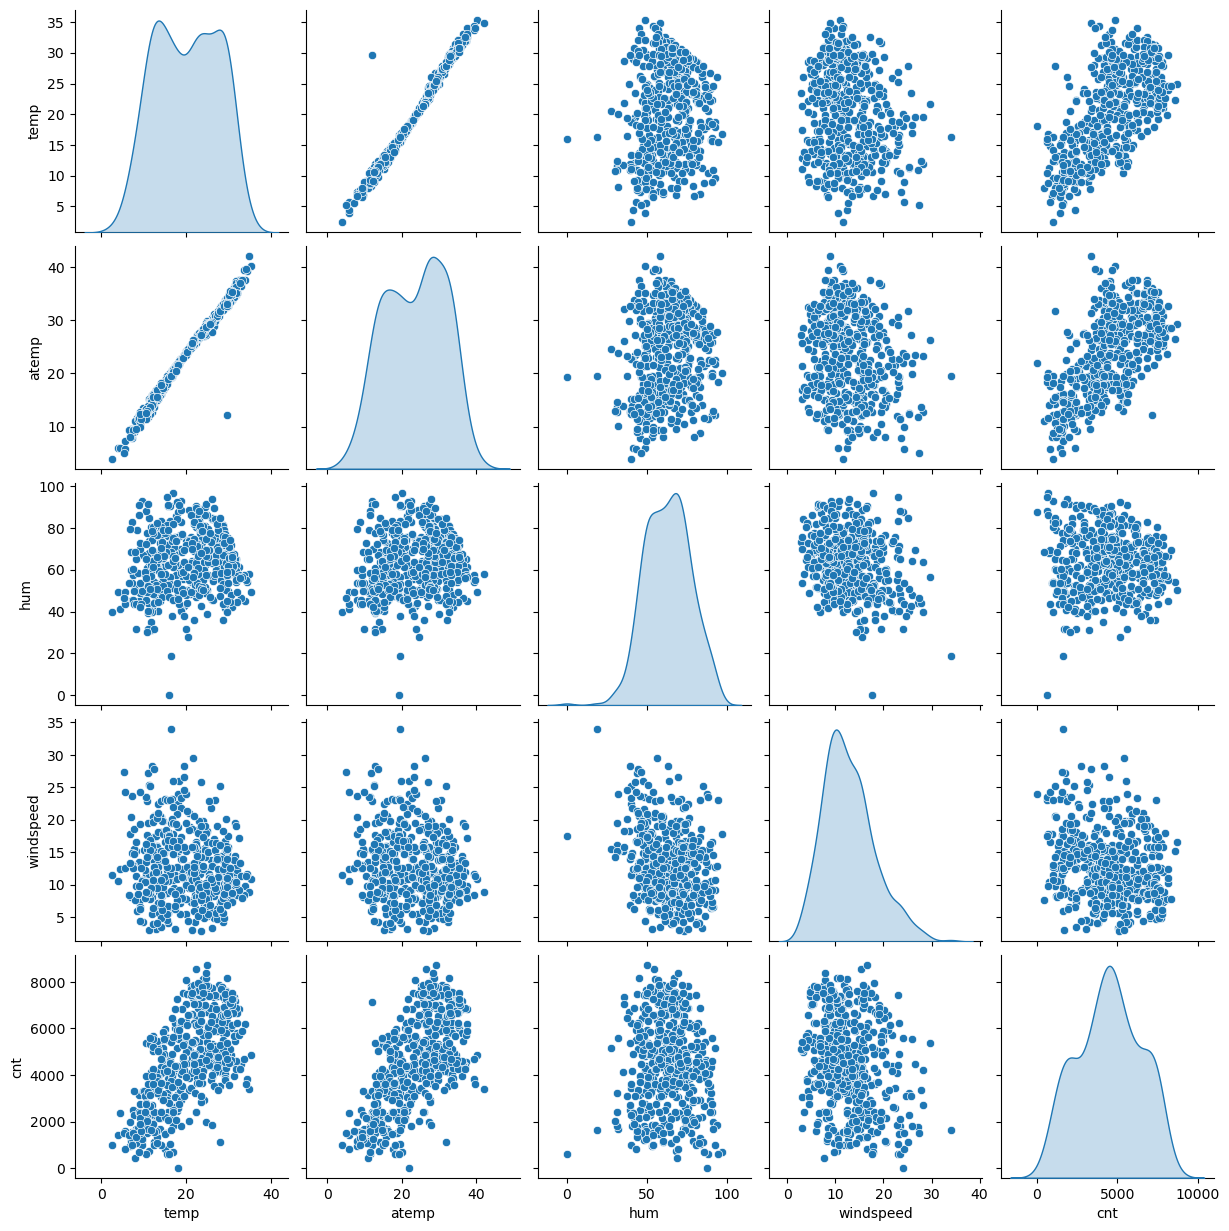

In [943]:
df_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

### Insights
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

## Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

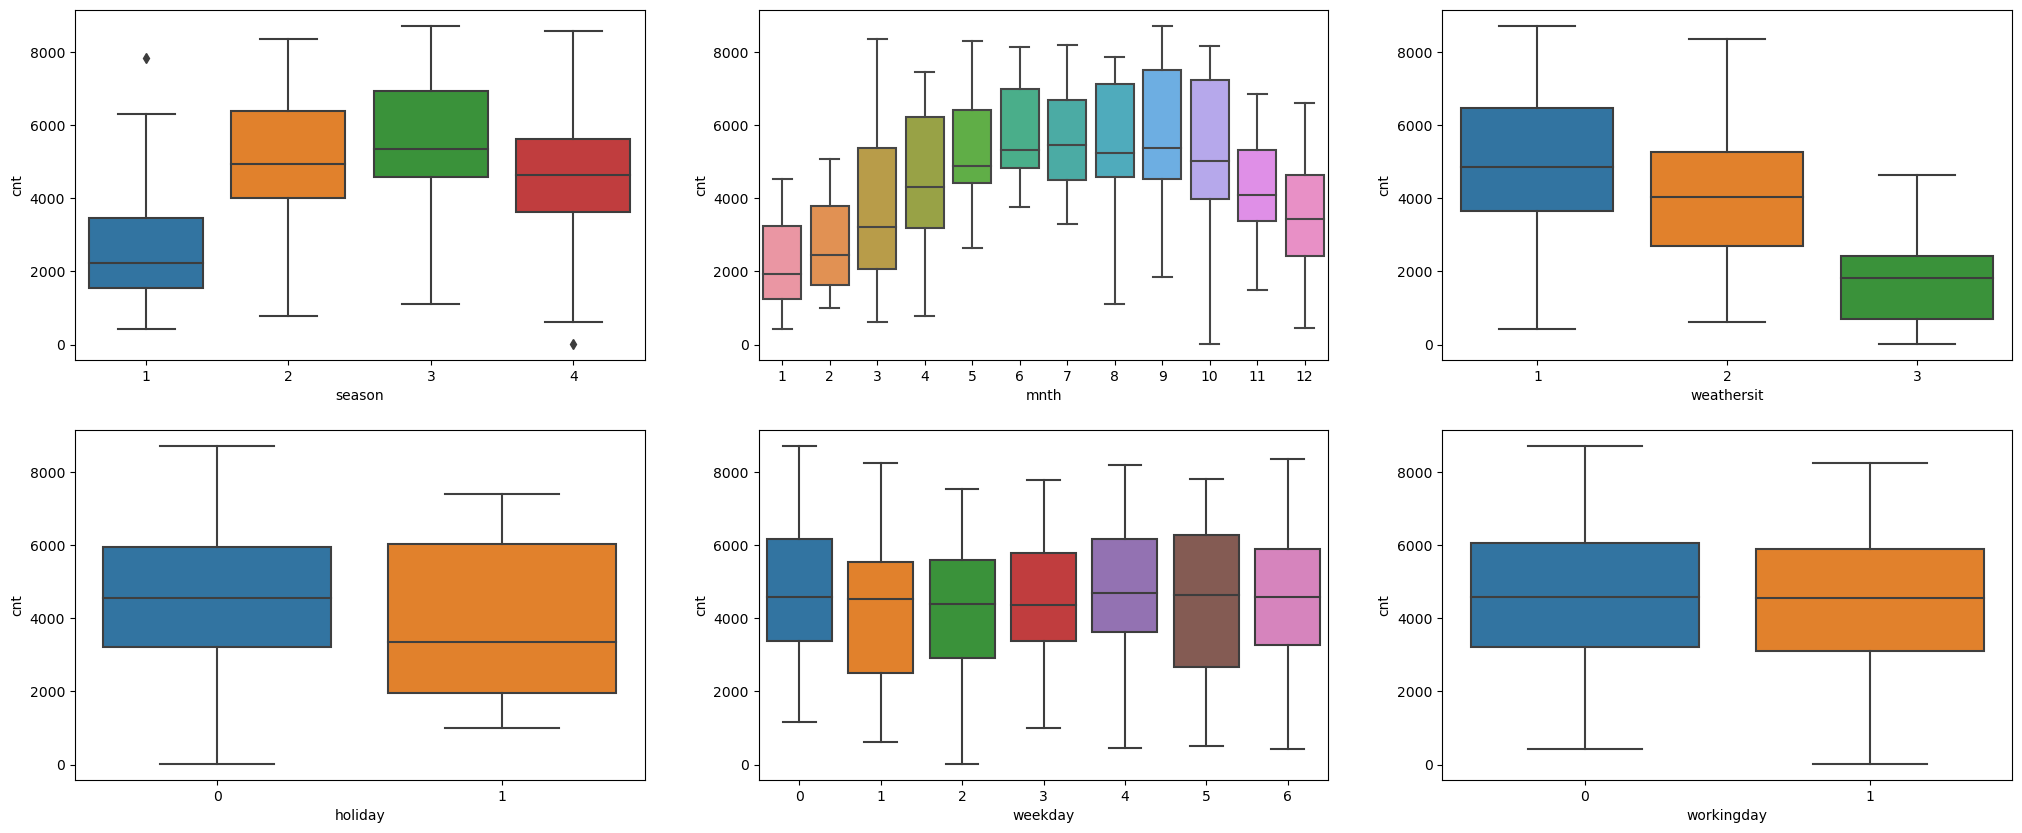

In [944]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Insights
- season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

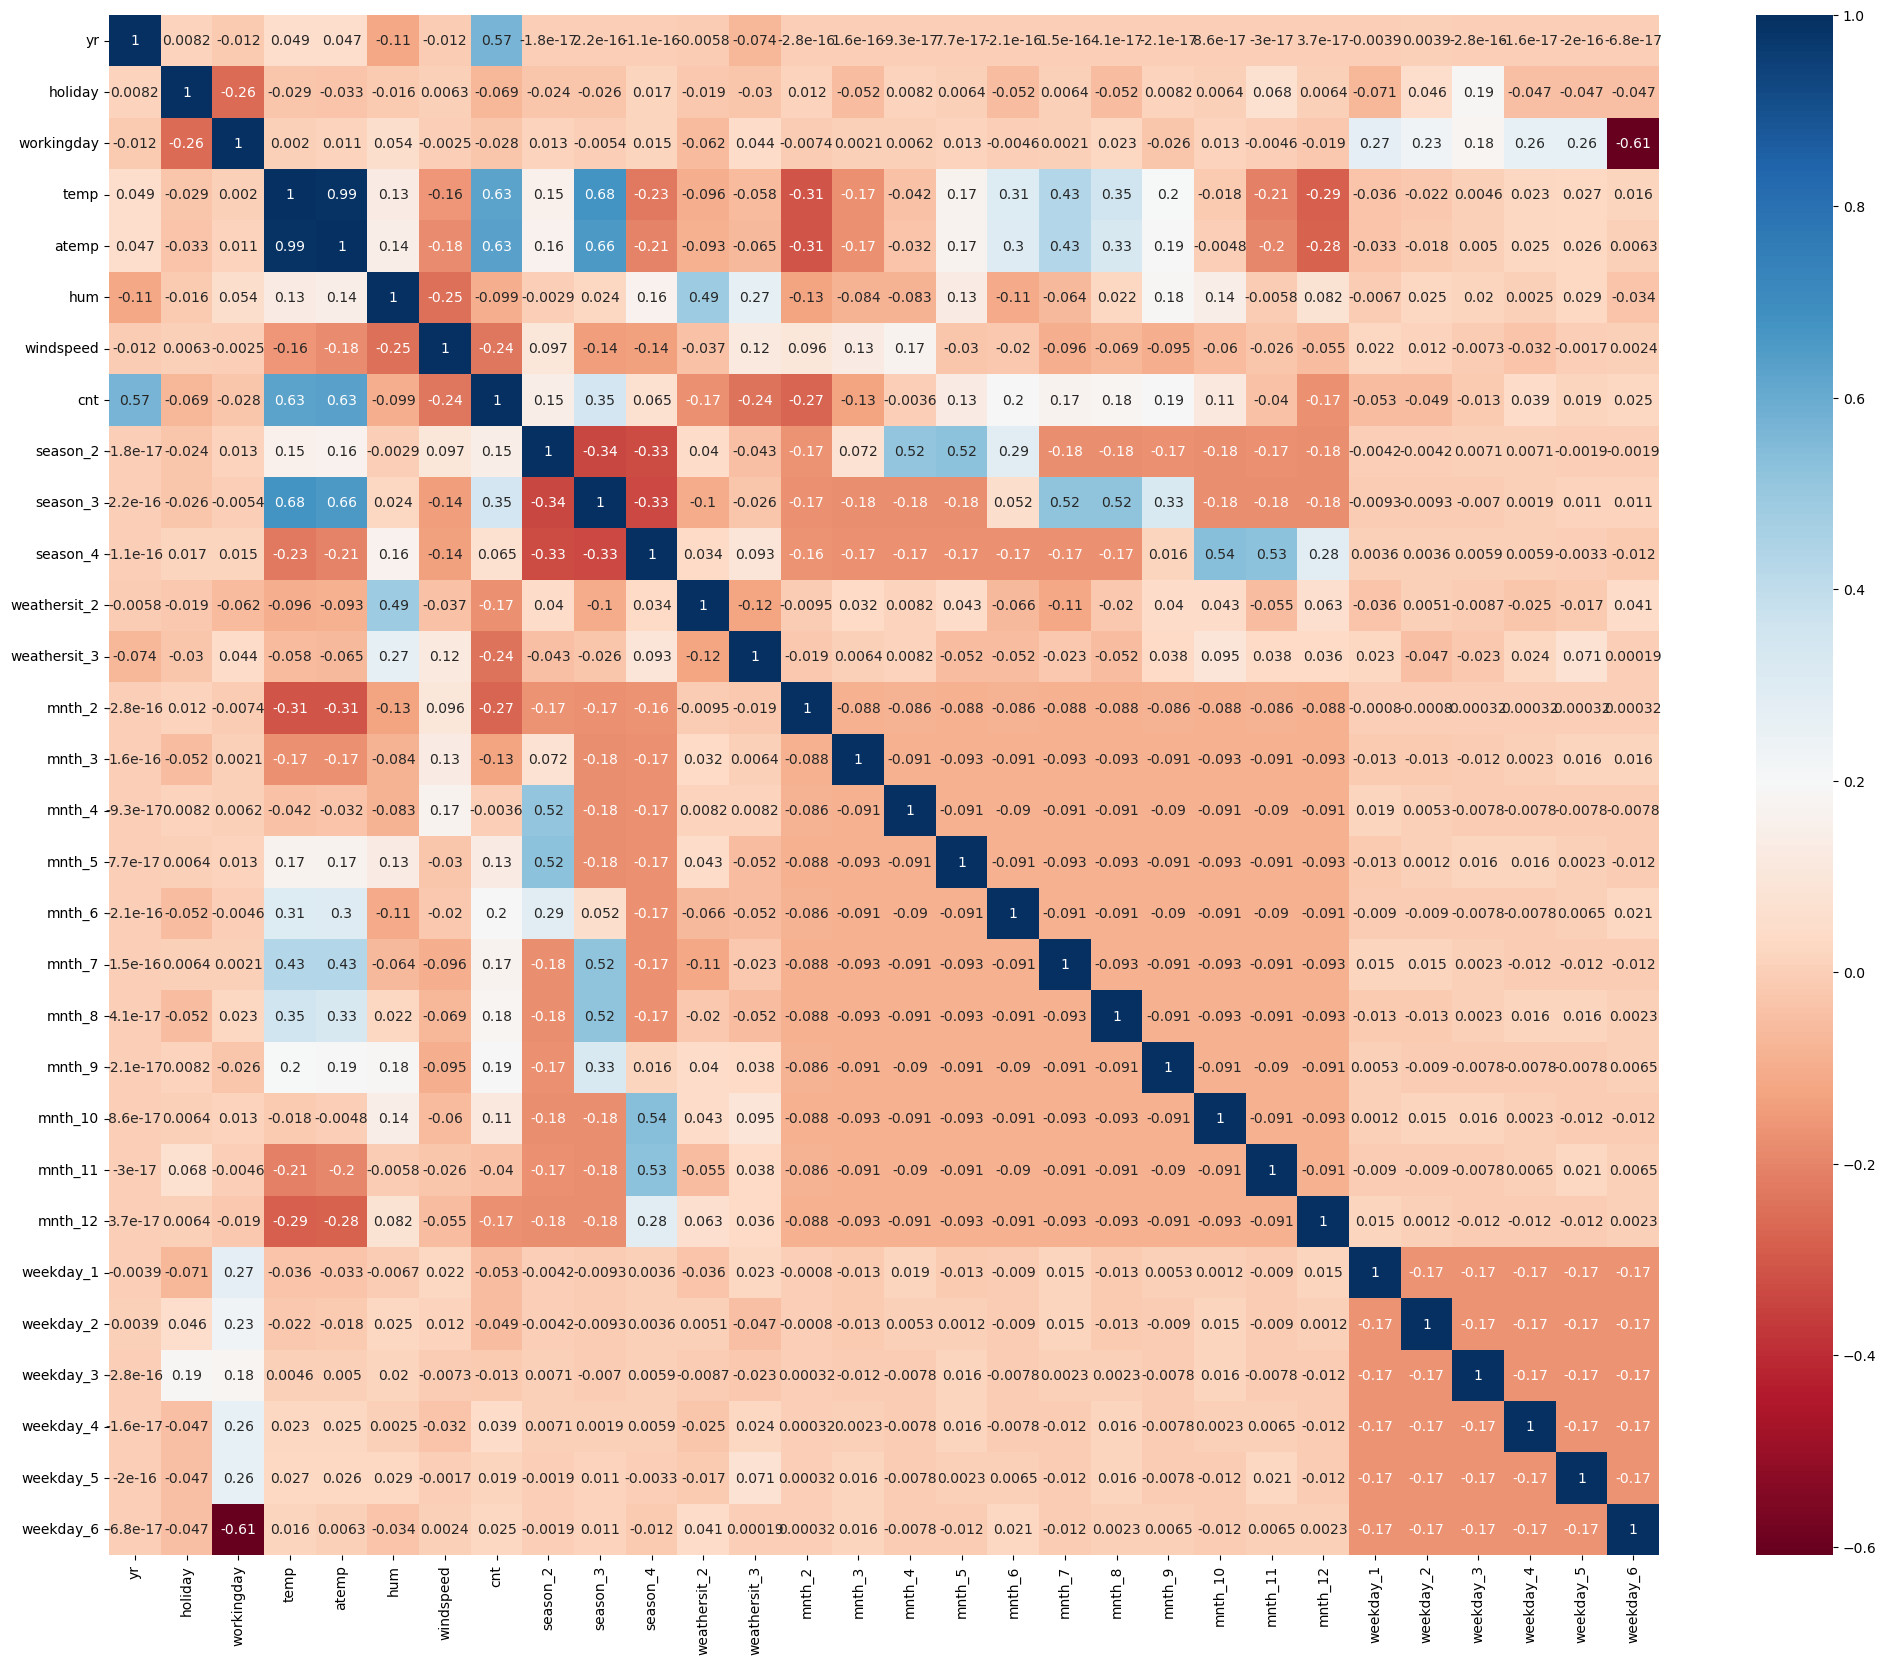

In [945]:
# Let's check the correlation coefficients to see which variables are highly correlated.
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Rescaling the Features 
Min-Max scaling 

In [946]:
from sklearn.preprocessing import MinMaxScaler

In [947]:
scaler = MinMaxScaler()

In [948]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,0,0


In [949]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [950]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [951]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,0


In [952]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.080392,0.086275,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.272166,0.281045,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Dividing into X and Y sets for the model building

In [953]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [954]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [955]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [956]:
rfe = RFE(lm, step=15)            
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), step=15)

In [957]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2)]

In [958]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'weathersit_3', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10'],
      dtype='object')

In [959]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_3', 'weathersit_2', 'mnth_2', 'mnth_4',
       'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [960]:
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'

### Model 1
VIF Check

In [961]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,10.73
3,hum,10.64
4,windspeed,3.77
5,season_2,2.47
6,season_4,2.33
0,yr,2.03
9,mnth_5,1.88
11,mnth_8,1.76
10,mnth_6,1.62
13,mnth_10,1.61


In [962]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [963]:
lr1.params

const           0.282098
yr              0.227217
holiday        -0.084711
temp            0.556287
hum            -0.296899
windspeed      -0.205042
season_2        0.091929
season_4        0.144658
weathersit_3   -0.195367
mnth_3          0.027895
mnth_5          0.030044
mnth_6          0.009575
mnth_8          0.059450
mnth_9          0.129773
mnth_10         0.038814
dtype: float64

In [964]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.66e-184
Time:                        19:09:48   Log-Likelihood:                 499.51
No. Observations:                 510   AIC:                            -969.0
Df Residuals:                     495   BIC:                            -905.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2821      0.027     10.557   

### Model 2
- Removing the variable 'mnth_6' based on its High p-value 

In [965]:
X_train_new = X_train_rfe.drop(["mnth_6"], axis = 1)

VIF check

In [966]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.45
2,temp,8.80
4,windspeed,3.74
6,season_4,2.32
5,season_2,2.30
0,yr,2.02
9,mnth_5,1.63
10,mnth_8,1.60
12,mnth_10,1.60
11,mnth_9,1.34


In [967]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [968]:
lr2.params

const           0.281854
yr              0.226993
holiday        -0.085205
temp            0.561268
hum            -0.298000
windspeed      -0.205922
season_2        0.093650
season_4        0.144236
weathersit_3   -0.195516
mnth_3          0.026583
mnth_5          0.026478
mnth_8          0.056789
mnth_9          0.127812
mnth_10         0.038082
dtype: float64

In [969]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.51e-185
Time:                        19:09:48   Log-Likelihood:                 499.38
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     496   BIC:                            -911.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2819      0.027     10.558   

### Model 3
- Removing the variable 'mnth_5' based on its High p-value 

In [970]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

VIF check

In [971]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,8.79
4,windspeed,3.68
6,season_4,2.31
0,yr,2.02
5,season_2,1.82
9,mnth_8,1.60
11,mnth_10,1.60
10,mnth_9,1.34
8,mnth_3,1.21


In [972]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [973]:
lr3.params

const           0.277278
yr              0.226570
holiday        -0.085966
temp            0.563745
hum            -0.290120
windspeed      -0.207262
season_2        0.102004
season_4        0.143412
weathersit_3   -0.197936
mnth_3          0.023222
mnth_8          0.054660
mnth_9          0.125835
mnth_10         0.037364
dtype: float64

In [974]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.85e-186
Time:                        19:09:48   Log-Likelihood:                 498.28
No. Observations:                 510   AIC:                            -970.6
Df Residuals:                     497   BIC:                            -915.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2773      0.027     10.446   

### Model 4
- Removing the variable 'mnth_3' based on its High p-value 

In [975]:
X_train_new= X_train_new.drop(["mnth_3"], axis = 1)

VIF check

In [976]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.04
2,temp,8.69
4,windspeed,3.57
6,season_4,2.24
0,yr,2.01
5,season_2,1.82
10,mnth_10,1.60
8,mnth_8,1.58
9,mnth_9,1.33
7,weathersit_3,1.10


In [977]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [978]:
lr4.params

const           0.283602
yr              0.226754
holiday        -0.088378
temp            0.558188
hum            -0.291138
windspeed      -0.204749
season_2        0.101956
season_4        0.139443
weathersit_3   -0.196423
mnth_8          0.052729
mnth_9          0.124306
mnth_10         0.037674
dtype: float64

In [979]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.03e-186
Time:                        19:09:49   Log-Likelihood:                 496.98
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2836      0.026     10.789   

### Model 5
- Removing the variable 'hum' based on its High vif 

In [980]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

VIF check

In [981]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,3.01
0,yr,2.00
5,season_4,1.91
4,season_2,1.79
9,mnth_10,1.60
7,mnth_8,1.58
8,mnth_9,1.32
6,weathersit_3,1.08
1,holiday,1.04


In [982]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [983]:
lr5.params

const           0.092588
yr              0.233699
holiday        -0.084295
temp            0.541032
windspeed      -0.144156
season_2        0.090573
season_4        0.124084
weathersit_3   -0.256532
mnth_8          0.041251
mnth_9          0.103346
mnth_10         0.025931
dtype: float64

In [984]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     207.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.41e-170
Time:                        19:09:49   Log-Likelihood:                 456.71
No. Observations:                 510   AIC:                            -891.4
Df Residuals:                     499   BIC:                            -844.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0926      0.018      5.283   

### Model 6
- Removing the variable 'mnth_10' based on its High P-value


In [985]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

VIF check


In [986]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.78
7,mnth_8,1.57
5,season_4,1.45
8,mnth_9,1.29
6,weathersit_3,1.06
1,holiday,1.04


In [987]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [988]:
lr6.params

const           0.089654
yr              0.233475
holiday        -0.085270
temp            0.547055
windspeed      -0.142560
season_2        0.089469
season_4        0.133008
weathersit_3   -0.252607
mnth_8          0.039048
mnth_9          0.099702
dtype: float64

In [989]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     229.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.24e-171
Time:                        19:09:49   Log-Likelihood:                 455.77
No. Observations:                 510   AIC:                            -891.5
Df Residuals:                     500   BIC:                            -849.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0897      0.017      5.151   

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.










In [990]:
y_train_pred = lr6.predict(X_train_lm6)


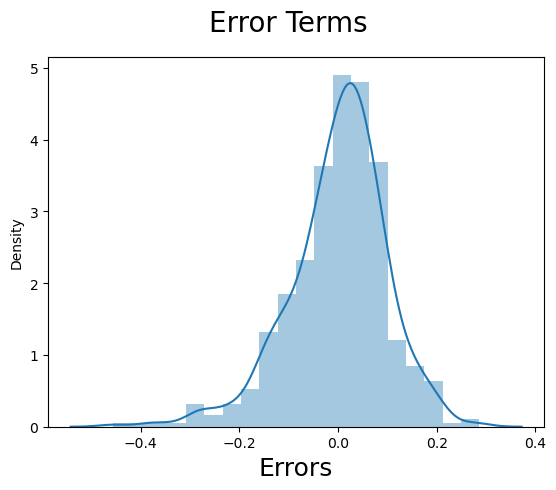

In [991]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Insights
- Error term is normally distrubuted


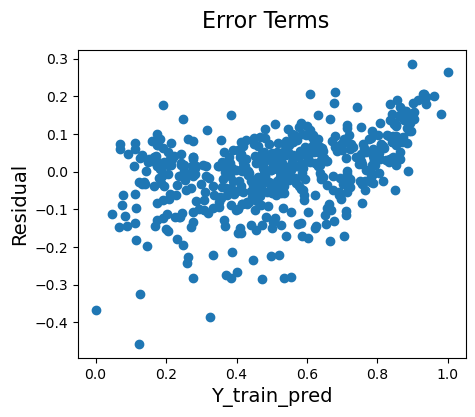

In [1004]:
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(5,4))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              
plt.xlabel('Y_train_pred', fontsize=14)                      
plt.ylabel('Residual', fontsize=14)  
plt.show()

### Insights:
- It seems like the corresponding residual plot is reasonably random.
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [993]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [994]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,0,0,1


In [995]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.086758,0.082192,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.282125,0.275286,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [996]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
 12  mnth_2        219 non-null    uint8  
 13  mnth_3        219 non-null    uint8  
 14  mnth_4        219 non-null    uint8  
 15  mnth_5        219 non-null    uint8  
 16  mnth_6        219 non-null    uint8  
 17  mnth_7        219 non-null    uint8  
 18  mnth_8        219 non-null   

In [997]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
 8   mnth_8        219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.3 KB


In [998]:
y_pred = lr6.predict(X_test_lm6)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

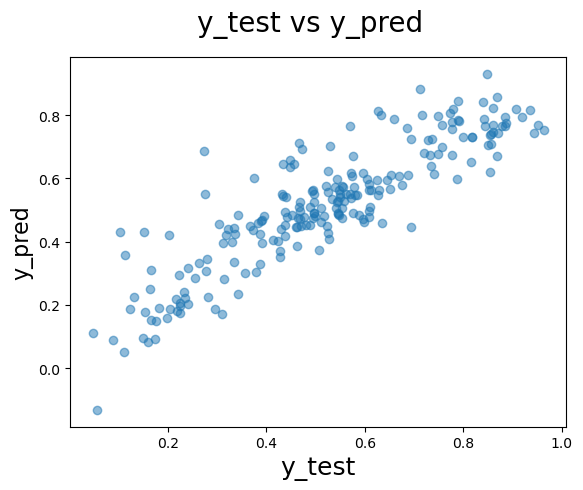

In [999]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [1000]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7736064262516151

## Adjusted R^2 Value for TEST

In [1001]:
# We already have the value of R^2 (calculated in above step)

r2=0.7736064262516151

In [1002]:
# Get the shape of X_test
X_test.shape

(219, 9)

In [1003]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7638574206835028

## Final Result Comparison

- Train R^2 :0.805
- Train Adjusted R^2 :0.802
- Test R^2 :0.773
- Test Adjusted R^2 :0.763
- This seems to be a really good model that can very well 'Generalize' various datasets.

### Coefficent for the variables are:

- const 0.0897
- yr 0.2335
- holiday -0.0853
- temp 0.5471
- windspeed -0.1426
- season_2 0.0895
- season_4 0.1330
- weathersit_3 -0.2526
- mnth_8 0.0390
- mnth_9 0.0997

### The equation of our best fitted line is:

#### cnt=  0.0897+ (0.2335*yr)-(0.0853*holiday)+(0.5471*temp)-(0.1426*windspeed)+(0.0895*season_2)+(0.1330*season_4)-(0.2526*weathersit_3)+(0.0390*mnth_8)+(0.0997*mnth_9)

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand